# Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing all the required libraries

In [39]:
traindata = pd.read_csv("C:\\Users\\rohit\\OneDrive\\Desktop\\Movie Rating\\Data\\IMDb Movies India.csv")

In [40]:
traindata.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [41]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Null Validation

In [42]:
traindata.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [43]:
traindata.dropna(inplace = True)

# Data Visualisation

In [28]:
testdata = traindata

In [29]:
testdata['Genre'] = testdata['Genre'].str.split(', ')
testdata = testdata.explode('Genre')
testdata
#As the 'Genre column has multiple genres listed for the same movie, we convert these into an array using .split(',')
#We then use .explode('Genre') to form multiple rows with each element of the array

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,(2019),110 min,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,(1989),125 min,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,(1999),129 min,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,(1998),130 min,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


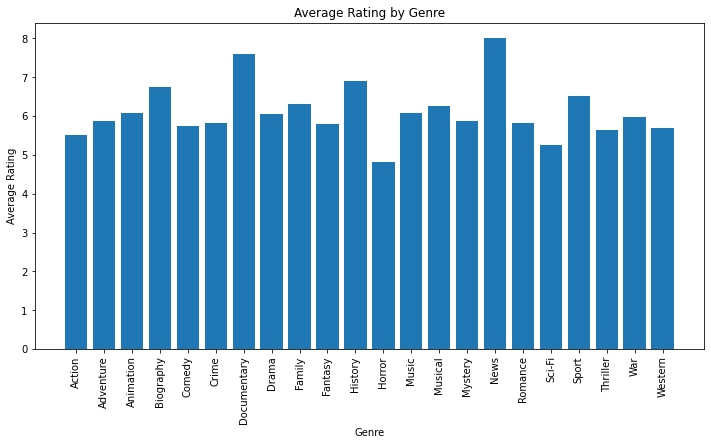

In [30]:
gen_rating = testdata.groupby('Genre')['Rating'].mean().reset_index()
#we create a dataframe with 2 columns which are the genres and their average ratings
plt.figure(figsize=(12, 6))
plt.bar(gen_rating['Genre'], gen_rating['Rating'])
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)
#By default, the x-axis labels can be horizontal, hence rotating them by 90 degrees (making them vertical) can help avoid overlapping and improve readability.
plt.show()

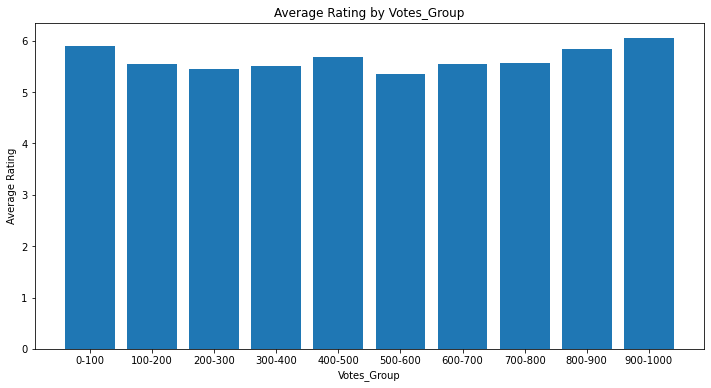

In [31]:
testdata['Votes'] = pd.to_numeric(testdata['Votes'], errors='coerce')
#We convert the data present under the 'Votes' column to numeric datatype.
bin_edges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bin_labels = ['0-100', '100-200', '200-300', '300-400', '400-500','500-600', '600-700', '700-800', '800-900', '900-1000']
testdata['Votes_Group'] = pd.cut(testdata['Votes'], bins=bin_edges, labels=bin_labels)
# Creating a new column in our dataframe which contains the group to which the numeric value under 'Votes' column belongs.
votes_rating = testdata.groupby('Votes_Group')['Rating'].mean().reset_index()
#we create a dataframe with 2 columns which are the votes group and their average ratings
plt.figure(figsize=(12, 6))
plt.bar(votes_rating['Votes_Group'], votes_rating['Rating'])
plt.xlabel('Votes_Group')
plt.ylabel('Average Rating')
plt.title('Average Rating by Votes_Group')
plt.show()
#below is a bar graph of how the average rating varies by the number of people that vote. We can see their isnt much fluctuation in the ratings even if a lot of people are voting

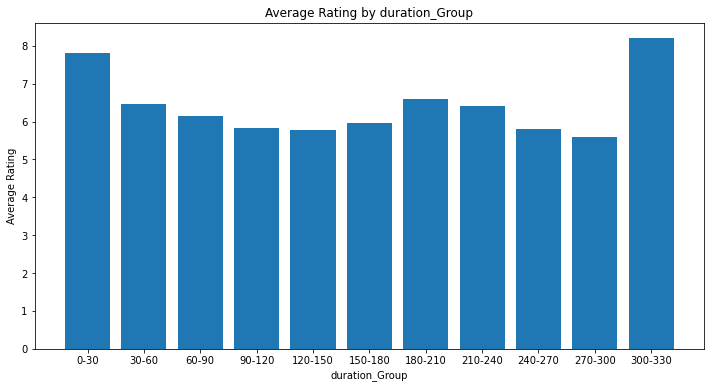

In [32]:
testdata['Duration'] = testdata['Duration'].str.replace('min', '').astype(float)
bin_edges = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
bin_labels = ['0-30', '30-60', '60-90', '90-120', '120-150','150-180', '180-210', '210-240', '240-270', '270-300', '300-330']
testdata['duration_Group'] = pd.cut(testdata['Duration'], bins=bin_edges, labels=bin_labels)
duration_rating = testdata.groupby('duration_Group')['Rating'].mean().reset_index()
#we create a dataframe with 2 columns which are the duration groups and their average ratings
plt.figure(figsize=(12, 6))
plt.bar(duration_rating['duration_Group'], duration_rating['Rating'])
plt.xlabel('duration_Group')
plt.ylabel('Average Rating')
plt.title('Average Rating by duration_Group')
plt.show()
#we cans ee the variation in ratings as the duration of the movie varies

<ipython-input-33-9e5b82f67247>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  testdata['Year'] = testdata['Year'].str.replace(r'[\(\)]', '').astype(int)


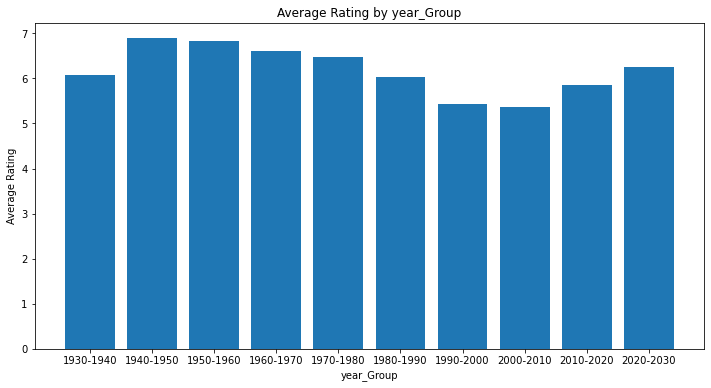

In [33]:
testdata['Year'] = testdata['Year'].str.replace(r'[\(\)]', '').astype(int)
bin_edges = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
bin_labels = ['1930-1940', '1940-1950', '1950-1960', '1960-1970', '1970-1980','1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2030']
testdata['year_Group'] = pd.cut(testdata['Year'], bins=bin_edges, labels=bin_labels)
year_rating = testdata.groupby('year_Group')['Rating'].mean().reset_index()
#we create a dataframe with 2 columns which are the duration groups and their average ratings
plt.figure(figsize=(12, 6))
plt.bar(year_rating['year_Group'], year_rating['Rating'])
plt.xlabel('year_Group')
plt.ylabel('Average Rating')
plt.title('Average Rating by year_Group')
plt.show()

# Feature Engineering

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
traindata['Genre'] = label_encoder.fit_transform(traindata['Genre'])
#giving numeric values to different genres

In [45]:
traindata.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,229,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,184,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,157,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,289,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,320,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [46]:
genre_mapping = {index: genre for index, genre in enumerate(label_encoder.classes_)}
genre_mapping

{0: 'Action',
 1: 'Action, Adventure',
 2: 'Action, Adventure, Biography',
 3: 'Action, Adventure, Comedy',
 4: 'Action, Adventure, Crime',
 5: 'Action, Adventure, Drama',
 6: 'Action, Adventure, Family',
 7: 'Action, Adventure, Fantasy',
 8: 'Action, Adventure, History',
 9: 'Action, Adventure, Horror',
 10: 'Action, Adventure, Musical',
 11: 'Action, Adventure, Mystery',
 12: 'Action, Adventure, Romance',
 13: 'Action, Adventure, Sci-Fi',
 14: 'Action, Adventure, Thriller',
 15: 'Action, Biography, Crime',
 16: 'Action, Biography, Drama',
 17: 'Action, Comedy',
 18: 'Action, Comedy, Crime',
 19: 'Action, Comedy, Drama',
 20: 'Action, Comedy, Fantasy',
 21: 'Action, Comedy, Horror',
 22: 'Action, Comedy, Musical',
 23: 'Action, Comedy, Mystery',
 24: 'Action, Comedy, Romance',
 25: 'Action, Comedy, Thriller',
 26: 'Action, Comedy, War',
 27: 'Action, Crime',
 28: 'Action, Crime, Drama',
 29: 'Action, Crime, Family',
 30: 'Action, Crime, Fantasy',
 31: 'Action, Crime, History',
 32: 'A

In [47]:
traindata['Director']

1          Gaurav Bakshi
3             Ovais Khan
5           Rahul Rawail
6         Shoojit Sircar
8          Allyson Patel
              ...       
15493        Mozez Singh
15494      Shyam Benegal
15503    S.P. Muthuraman
15505         Kuku Kohli
15508       K.C. Bokadia
Name: Director, Length: 5659, dtype: object

In [48]:
training_data['Director'].nunique()

5938

In [49]:
traindata['Director'] = label_encoder.fit_transform(traindata['Director'])

In [50]:
traindata.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,229,7.0,8,629,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,184,4.4,35,1335,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,157,4.7,827,1530,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,289,7.4,"1,086",2044,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,320,5.6,326,135,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [51]:
traindata["Actor 1"] = label_encoder.fit_transform(traindata["Actor 1"])

In [52]:
traindata["Actor 2"] = label_encoder.fit_transform(traindata["Actor 2"])

In [53]:
traindata["Actor 3"] = label_encoder.fit_transform(traindata["Actor 3"])

In [54]:
traindata.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,229,7.0,8,629,1352,2272,319
3,#Yaaram,(2019),110 min,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,(1997),147 min,157,4.7,827,1530,378,75,2045
6,...Yahaan,(2005),142 min,289,7.4,"1,086",2044,692,1112,2524
8,?: A Question Mark,(2012),82 min,320,5.6,326,135,1934,1175,1013


In [55]:
columns_to_drop = ['Name', 'Duration', 'Votes', 'Year', 'Rating']

In [57]:
predictors = traindata.drop(columns_to_drop, axis = 1)
predictors

,Genre,Director,Actor 1,Actor 2,Actor 3
1,229,629,1352,2272,319
3,184,1335,1198,719,2148
5,157,1530,378,75,2045
6,289,2044,692,1112,2524
8,320,135,1934,1175,1013
...,...,...,...,...,...
15493,229,1223,1861,1801,1615
15494,133,2059,763,1619,1184
15503,28,1793,406,754,1685
15505,38,1025,112,2164,314


In [66]:
target = traindata['Rating']
target

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

# Training the model

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(predictors,target,test_size=0.33, random_state=0)

In [74]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

# Checking the accuracy

In [75]:
#For regression problems (predicting continuous values), typical evaluation metrics include Mean Squared Error (MSE)
# Calculate mean squared error (or other appropriate regression metric)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3.424357601713062
